# HW9

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mrsteamedbun/AIPI590/blob/main/HW9/hw9.ipynb)

Goal: Apply XAI to prompting via saliency scores to analyze key components of a prompt: symbols, patterns, and text. 

In [14]:
import openai
import re
import matplotlib.pyplot as plt

openai.api_key = "key"

def get_gpt_prediction(prompt):
    completion = openai.chat.completions.create(
        model="gpt-4",
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return completion.choices[0].message.content

def compute_saliency(prompt):
    tokens = split_with_symbols(prompt)
    base_prediction = get_gpt_prediction(prompt)

    saliency_scores = []
    for i in range(len(tokens)):
        modified_prompt = ' '.join(tokens[:i] + tokens[i+1:])
        modified_prediction = get_gpt_prediction(modified_prompt)

        score = compute_similarity(base_prediction, modified_prediction)
        saliency_scores.append((tokens[i], score))

    return saliency_scores

def compute_similarity(pred1, pred2):
    return abs(len(pred1.split()) - len(pred2.split()))

def split_with_symbols(text):
    # This regex splits text by words and symbols, preserving symbols as tokens
    tokens = re.findall(r'\w+|[^\w\s]', text, re.UNICODE)
    return tokens

prompt = "The stock market experienced significant growth last quarter."
saliency_scores = compute_saliency(prompt)
tokens = split_with_symbols(prompt)
scores = []

for token, score in saliency_scores:
    scores.append(score)
    print(f"Token: {token}, Saliency Score: {score}")


Token: The, Saliency Score: 38
Token: stock, Saliency Score: 220
Token: market, Saliency Score: 211
Token: experienced, Saliency Score: 23
Token: significant, Saliency Score: 179
Token: growth, Saliency Score: 241
Token: last, Saliency Score: 175
Token: quarter, Saliency Score: 5
Token: ., Saliency Score: 36


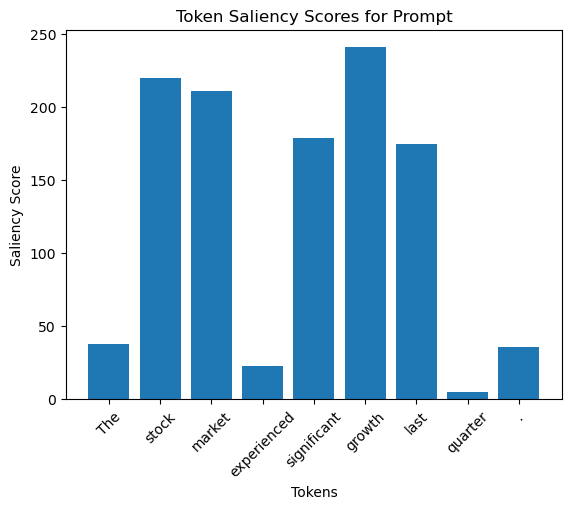

In [16]:
plt.bar(tokens, scores)
plt.xlabel("Tokens")
plt.ylabel("Saliency Score")
plt.title("Token Saliency Scores for Prompt")
plt.xticks(rotation=45)

# Show the plot
plt.show()

Symbols: Using the re module, symbols are split from words by a regular expression that isolates punctuation and special characters, ensuring they are treated as standalone tokens. This approach allows each symbol to be analyzed independently for its contribution to the model’s response.

Patterns: Without an NLP module, complex patterns like conditional structures, comparisons, or sequences might not be systematically detected, as these require syntactic parsing or dependency analysis. To handle patterns effectively, an NLP library like spaCy is essential for identifying logical phrases and grammatical constructs.

Text: Text is converted into individual tokens, treating each word as a separate unit, allowing for word-by-word saliency analysis. This tokenization enables us to evaluate the influence of each specific term on the model’s response.

Reference
https://github.com/brinnaebent/Duke-A1-XAl/blob/main/explainable-ml-example-notebooks/saliency_maps.ipynb